#  Clustering

## K-means

We are going to use some synthetic datasets to understand various aspects of Lloyd's algorithm for the k-means  clustering problem.

In [1]:
#use the following numero di matricola
numero_di_matricola = 6

In [2]:
#import all packages needed
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs, make_circles

We start by generating a simple dataset using the $\texttt{make\_blobs}$ function.

Text(0.5, 1.0, 'Input data')

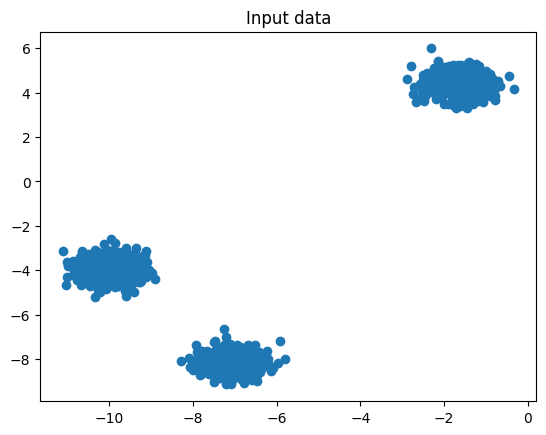

In [3]:
n_samples = 1500

X, y = make_blobs(n_samples=n_samples, cluster_std=[0.4, 0.4, 0.4], random_state = 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

What do you expect a reasonable clustering algorithm to provide as clustering? 

Let's check if this is what we obtain with the $\texttt{KMeans}$ package.

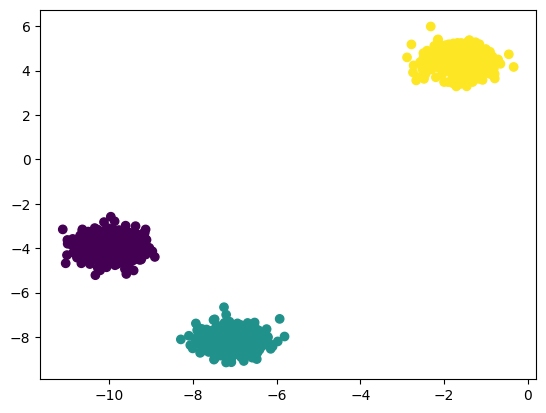

In [4]:
y_pred = KMeans(n_clusters=3, init='random', n_init=1, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What is going on here?

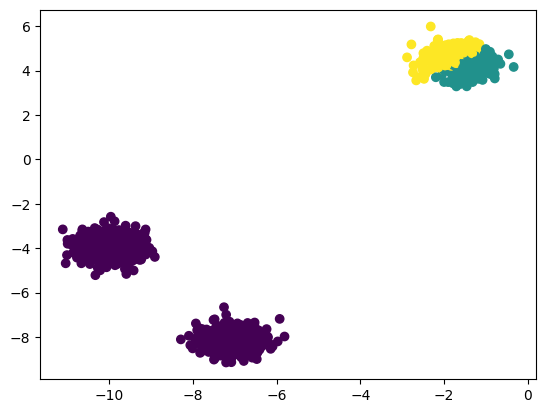

In [5]:
y_pred = KMeans(n_clusters=3, init=np.array([[-9, -6],[0, 2],[-4, 6]]), n_init=1, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Ok, maybe we now understand what is going on. How can we check if this is really the case?

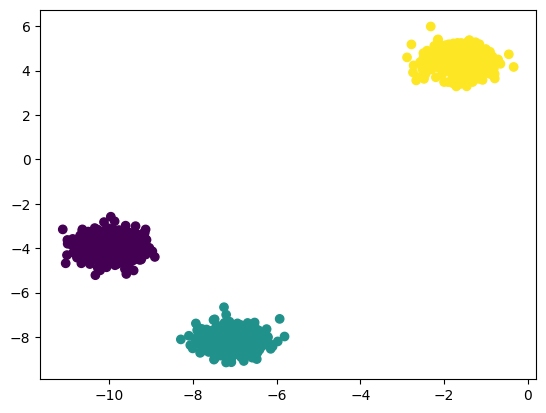

In [6]:
y_pred = KMeans(n_clusters=3, init='random', n_init=10, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

How can we solve this issue? 

What is the parameter in $\texttt{KMeans}$ to do this?

Let's try and see what happens.

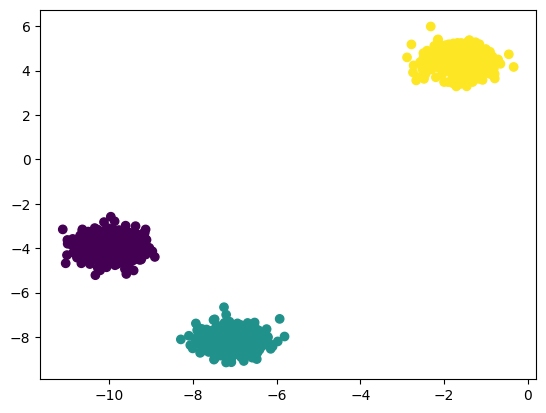

In [7]:
y_pred = KMeans(n_clusters=3, init='random', n_init=10, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about being able to choose the centers that are kind of far away from each other? This is what is achieved by the $\texttt{k-means++}$ initialization algorithm.

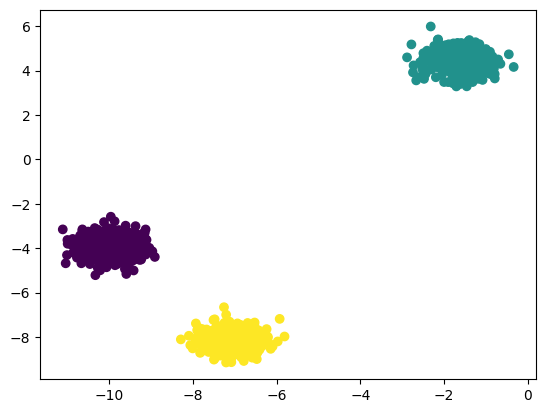

In [8]:
y_pred = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## Choice of the number k of clusters

Lloyd's algorithm assumes that the number $k$ of desired clusters is passed as input. In some applications it makes sense, but in others we do not know $k$. How can decide the value of $k$?

Let's see how the value of the objective function changes when using $k \in \{2, 3, 4, 5\}$. For each value of $k$, we also _print the value of the objective function_ (have a look at the documentation of scikit-learn).

In [9]:
clustering_k2 = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=1).fit(X)
print(clustering_k2.inertia_)

clustering_k3 = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1).fit(X)
print(clustering_k3.inertia_)

clustering_k4 = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=1).fit(X)
print(clustering_k4.inertia_)

clustering_k5 = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1).fit(X)
print(clustering_k5.inertia_)

7035.504153300217
474.2997124733592
417.20600254621536
364.8931839370222


Is the clustering with the smallest value of the cost the best one? Let's visualize it.

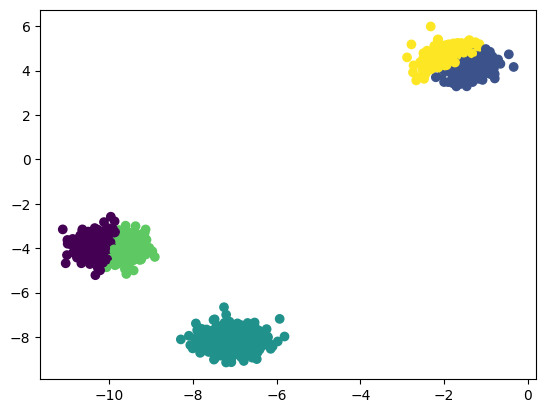

In [10]:
y_pred = clustering_k5.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Why does this happen?

Let's use a different approach: the silhouette coefficient. For each of the clusterings obtained above (with $k \in \{2,3,4,5\}$), compute its average silhouette score (again, see the documentation of scikit-learn for more details).

In [11]:
from sklearn.metrics import silhouette_score

silhouette_avg_k2 = silhouette_score(X, clustering_k2.predict(X))
print("The average silhouette_score for k=2 is :",silhouette_avg_k2)

silhouette_avg_k3 = silhouette_score(X, clustering_k3.predict(X))
print("The average silhouette_score for k=3 is :",silhouette_avg_k3)

silhouette_avg_k4 = silhouette_score(X, clustering_k4.predict(X))
print("The average silhouette_score for k=4 is :",silhouette_avg_k4)

silhouette_avg_k5 = silhouette_score(X, clustering_k5.predict(X))
print("The average silhouette_score for k=5 is :",silhouette_avg_k5)

The average silhouette_score for k=2 is : 0.8275838311475989
The average silhouette_score for k=3 is : 0.8876900165022624
The average silhouette_score for k=4 is : 0.7065005311249621
The average silhouette_score for k=5 is : 0.49899050154984487


Let's test this approach to a new dataset, similar to the previous one, but with a bit more noise.  

Text(0.5, 1.0, 'Input data')

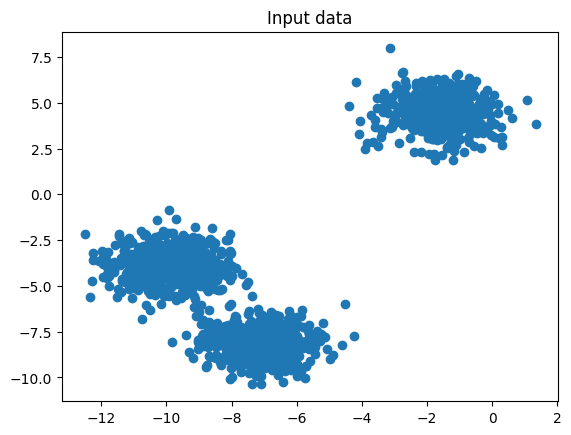

In [12]:
n_samples = 1500

X, y = make_blobs(n_samples=n_samples, cluster_std=[0.9, 0.9, 0.9], random_state = 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let's compute the values of the silhouette score for different values of $k \in \{2,3,4,5\}$ as before. Remember to perform again the clustering for the new data!

In [13]:
clustering_k2 = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=numero_di_matricola).fit(X)
clustering_k3 = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=numero_di_matricola).fit(X)
clustering_k4 = KMeans(n_clusters=4, init='k-means++', n_init=1, random_state=numero_di_matricola).fit(X)
clustering_k5 = KMeans(n_clusters=5, init='k-means++', n_init=1, random_state=numero_di_matricola).fit(X)

silhouette_avg_k2 = silhouette_score(X, clustering_k2.predict(X))
print("The average silhouette_score for k=2 is :",silhouette_avg_k2)

silhouette_avg_k3 = silhouette_score(X, clustering_k3.predict(X))
print("The average silhouette_score for k=3 is :",silhouette_avg_k3)

silhouette_avg_k4 = silhouette_score(X, clustering_k4.predict(X))
print("The average silhouette_score for k=4 is :",silhouette_avg_k4)

silhouette_avg_k5 = silhouette_score(X, clustering_k5.predict(X))
print("The average silhouette_score for k=5 is :",silhouette_avg_k5)

The average silhouette_score for k=2 is : 0.7783915707249568
The average silhouette_score for k=3 is : 0.7477129398254105
The average silhouette_score for k=4 is : 0.6050041185661299
The average silhouette_score for k=5 is : 0.4974275847415165


According to the silhouette score, which is the best value for $k$? Let's also have a look at the objective function.

In [14]:
print(clustering_k2.inertia_)
print(clustering_k3.inertia_)
print(clustering_k4.inertia_)
print(clustering_k5.inertia_)

8964.361192400735
2393.008942979262
2133.9493382721835
1843.7321745825445


By looking both at the value of the objective function and at the silhouette score, which is the best value for $k$? Why?

Let's plot the (normalized) objective function and the silhouette score to better understand what happens.

Clustering with k=2: Cost=8964.36, Silhouette=0.78
Clustering with k=3: Cost=2393.01, Silhouette=0.75
Clustering with k=4: Cost=2133.95, Silhouette=0.61
Clustering with k=5: Cost=1843.73, Silhouette=0.50
Clustering with k=6: Cost=1669.08, Silhouette=0.50
Clustering with k=7: Cost=1508.88, Silhouette=0.50
Clustering with k=8: Cost=1226.84, Silhouette=0.33
Clustering with k=9: Cost=1071.64, Silhouette=0.34
Clustering with k=10: Cost=986.25, Silhouette=0.33


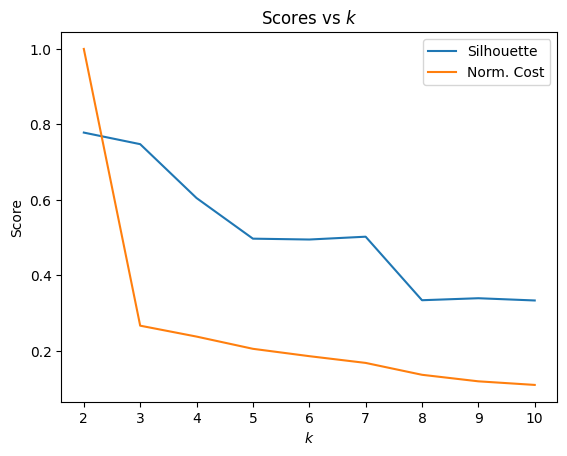

In [15]:
n_clusters = range(2, 11)
silhouettes = []
obj_fun_scores = []

for k in n_clusters:
    clustering = KMeans(n_clusters=k, 
                        init='k-means++',
                        n_init=1, 
                        random_state=numero_di_matricola).fit(X)
    silhouette = silhouette_score(X, clustering.predict(X))
    silhouettes.append(silhouette)
    obj_fun_scores.append(clustering.inertia_)
    print(f"Clustering with k={k}: Cost={clustering.inertia_:.2f}, Silhouette={silhouette:.2f}")

obj_fun_scores = np.array(obj_fun_scores)
obj_fun_scores = obj_fun_scores / max(obj_fun_scores)

plt.plot(n_clusters, silhouettes, label='Silhouette')
plt.plot(n_clusters, obj_fun_scores, label='Norm. Cost')
plt.title(r'Scores vs $k$')
plt.xlabel(r'$k$')
plt.ylabel('Score')
plt.legend();

## Limitation of $k$-means

The results look good on a simple dataset, but what about a more complicated one? Let's generate a dataset using $\texttt{make\_circles}$.

Text(0.5, 1.0, 'Input data')

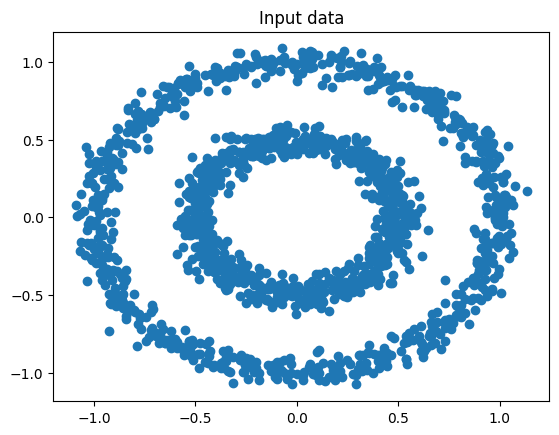

In [16]:
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let's run Lloyd's algorithm with random initialization.

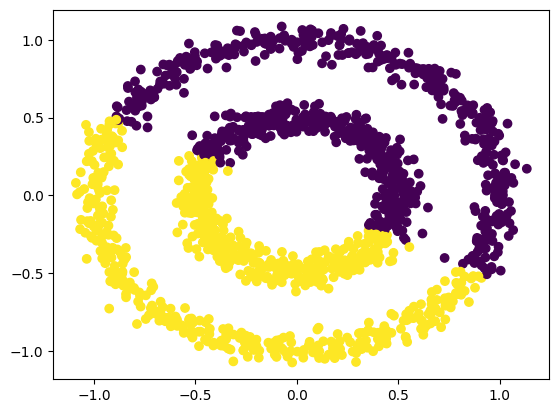

In [17]:
y_pred = KMeans(n_clusters=2, init='random', n_init=1, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about with $\texttt{k-means++}$?

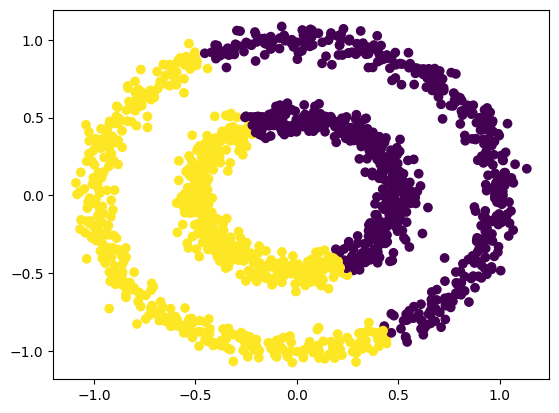

In [18]:
y_pred = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Let's try with a different clustering technique: _agglomerative_ clustering!

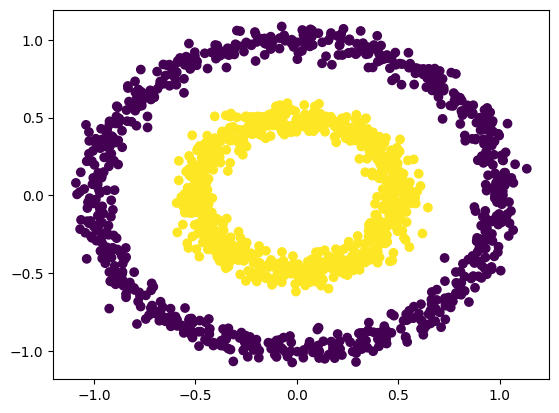

In [19]:
y_pred = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about the simple dataset we used at the beginning? Let's generate the dataset.

Text(0.5, 1.0, 'Input data')

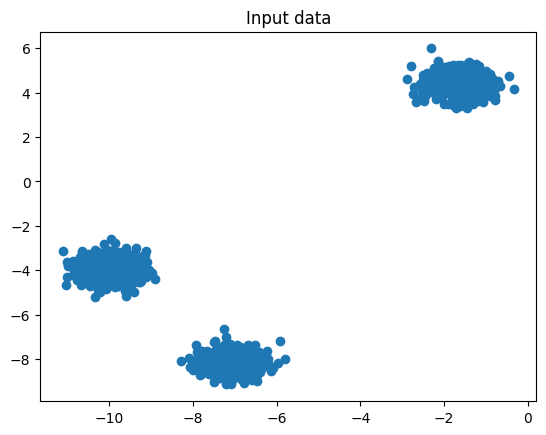

In [20]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[0.4, 0.4, 0.4], random_state=1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let use hierarchical clustering with the _single_ linkage options.

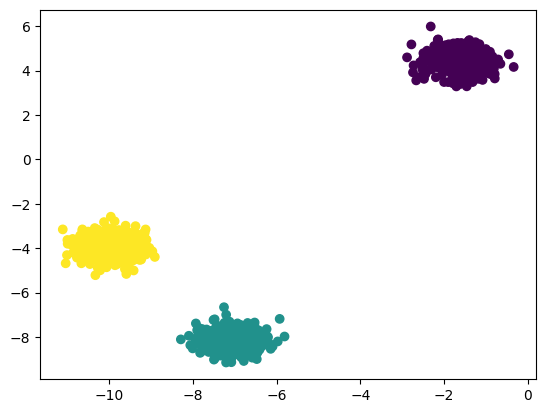

In [21]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage='single').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Let's try a more complex dataset, but still with some easy-to-detect cluster structure.

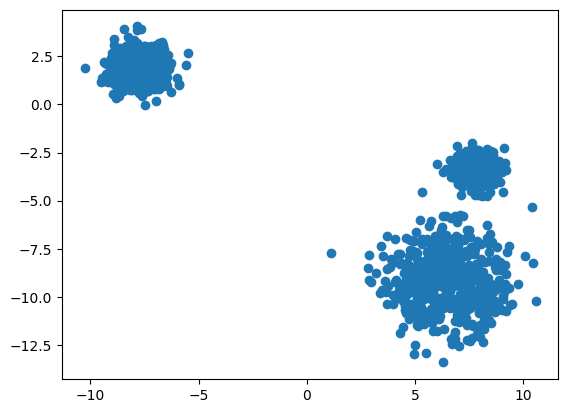

In [22]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[0.5, 1.5, 0.7], random_state=numero_di_matricola)
plt.scatter(X[:, 0], X[:, 1])

What do we expect as a reasonable clustering?

Let's try with Lloyd's algorithm, and also with k-means++ initialization.

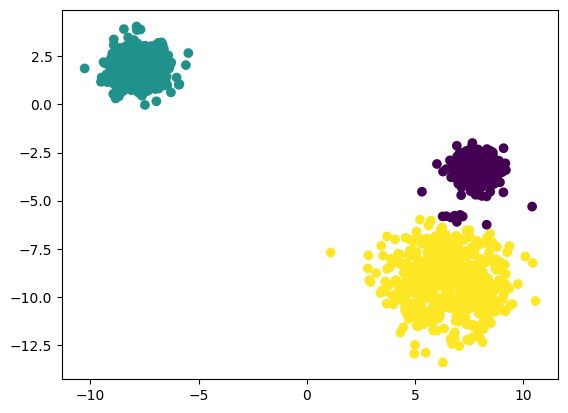

In [23]:
y_pred = KMeans(n_clusters=3, init='random', n_init=10, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

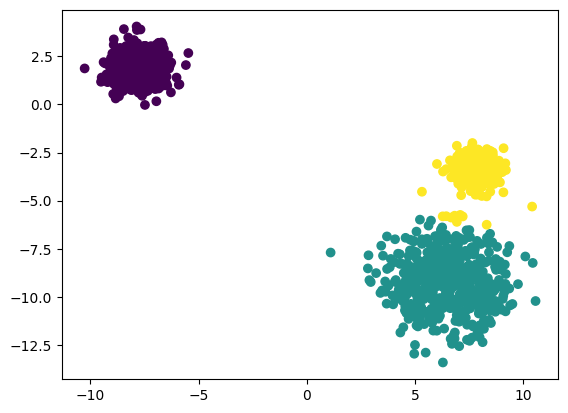

In [24]:
y_pred = KMeans(n_clusters=3, init='k-means++', random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about hierarchical clustering?

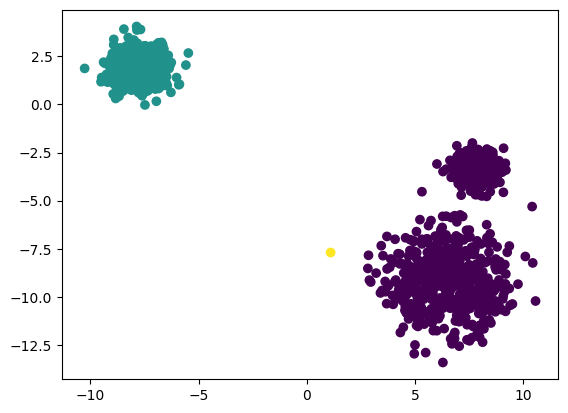

In [25]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage='single').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Moral of the story: no ultimate clustering technique!

### Plot function (silhouette & obj. fun.)

In [ ]:
n_clusters = range(2, 11)
silhouettes = []
obj_fun_scores = []

for k in n_clusters:
    clustering = KMeans(n_clusters=k, 
                        init='k-means++',
                        n_init=1, 
                        random_state=numero_di_matricola).fit(X)
    silhouette = silhouette_score(X, clustering.predict(X))
    silhouettes.append(silhouette)
    obj_fun_scores.append(clustering.inertia_)
    print(f"Clustering with k={k}: Cost={clustering.inertia_:.2f}, Silhouette={silhouette:.2f}")

obj_fun_scores = np.array(obj_fun_scores)
obj_fun_scores = obj_fun_scores / max(obj_fun_scores)

plt.plot(n_clusters, silhouettes, label='Silhouette')
plt.plot(n_clusters, obj_fun_scores, label='Norm. Cost')
plt.title(r'Scores vs $k$')
plt.xlabel(r'$k$')
plt.ylabel('Score')
plt.legend();

### Since is the last lab ...

In [ ]:
import random

def christmas_tree():
    tree_height = 16

    print("\n\n🎄 Merry Christmas! 🎄\n".center(40))

    for i in range(tree_height):
        
        spaces = " " * (tree_height - i - 1)

        if i == 0:
            layer_content = "⭐"
        else:
            contents = [ "🍃", "🟡", "🔴", "🔵"]
            content = random.choices(contents, weights = [0.7, 0.1, 0.1, 0.1], k = 2 * i + 1)
            delimiter = ""
            layer_content = delimiter.join(content)

        print((spaces + layer_content).center(40))

    trunk = " " * (tree_height - 1) + "🟫"
    print(trunk.center(40))

christmas_tree()